In [1]:
import numpy as np  
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go


In [5]:
df = pd.read_csv("")

In [6]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [7]:
df.shape

(12330, 18)

In [9]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [10]:
x = df.iloc[:,[5,6]].values

In [11]:
x.shape

(12330, 2)

In [19]:
from sklearn.cluster import KMeans

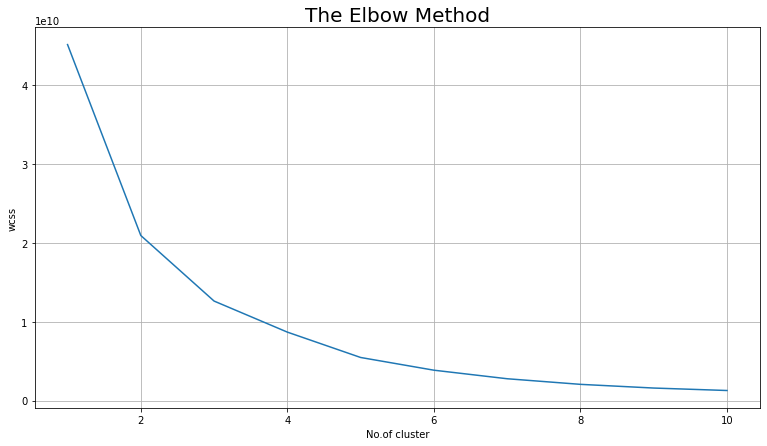

In [21]:
wcss = []
for i  in range(1,11):
    km = KMeans(n_clusters = i,init = 'k-means++',max_iter = 300,n_init=10,random_state =0,algorithm ='full',tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
plt.rcParams['figure.figsize'] = (13,7)
plt.plot(range(1,11),wcss)
plt.grid()
plt.title("The Elbow Method",fontsize = 20)
plt.xlabel("No.of cluster")
plt.ylabel("wcss")
plt.show()


In [4]:
from sklearn.cluster import KMeans

x = df.iloc[:,[5,6]].values
km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means==0,0],x[y_means==0,1],s=50,c='yellow',label='Uniterested Customers')
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=50,c='pink',label='Target Customers')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=50,c='blue',label='centroid')

plt.title('ProductRelated Duration vs Bounce Rate', fontsize=20)
plt.grid()
plt.xlabel('ProductRealted Duration')
plt.ylabel('Bounce Rates')
plt.legend(lables =' ')
plt.show()

NameError: name 'df' is not defined

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()
labels_true = le.fit_transform(df['Revenue'])

In [25]:
labels_pred = y_means

In [26]:
from sklearn import metrics

In [27]:
score = metrics.adjusted_rand_score(labels_true, labels_pred)

In [28]:
print("Adjusted rand index: ")
print(score)

Adjusted rand index: 
0.08359442469281096


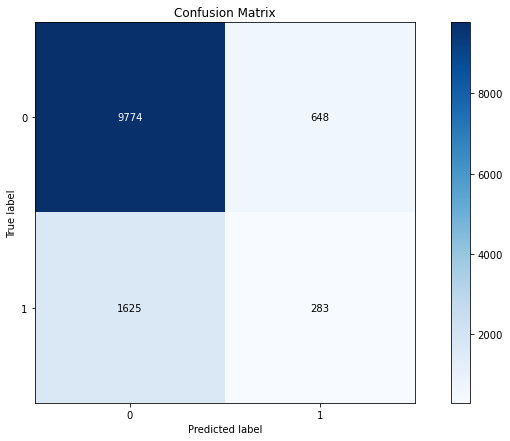

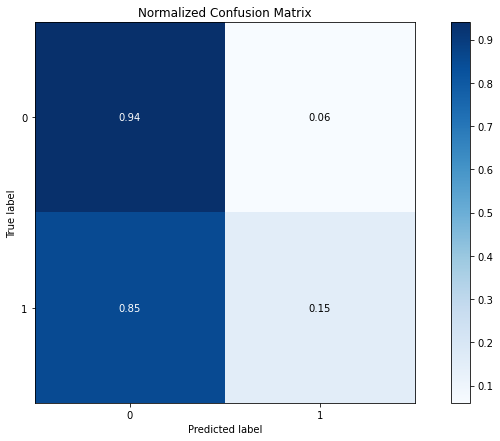

In [30]:
import scikitplot as skplt
plt_1 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=False)
plt_2 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=True)

In [ ]:
From the confusion matrix, we can see that out of 10,422 failed incomes, 
9,769 are grouped into uninterested customers or 94%. However, out of 937 successful incomes, 
only 284 are grouped as target customers or 15%. Also, the adjusted index score is not very high.